In [1]:
import pandas as pd

# Dữ liệu clickstream

In [2]:
clickstream = pd.read_csv("../data/raw/click_stream.csv")
clickstream.head(5)

C:\Users\Acer\AppData\Local\Temp\ipykernel_19412\3786816725.py:1: DtypeWarning: Columns (7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  clickstream = pd.read_csv("../data/raw/click_stream.csv")


,customer_id,session_id,event_name,event_time,event_id,traffic_source,event_metadata,payment_status,search_keywords,booking_id,product_id,quantity,item_price,price_usd
0,98980.0,5a055089-d013-49cd-bb97-1feaf69e5519,ADD_TO_CART,2026-02-04 19:17:15.252676,4210ef54-aabb-4c6d-9451-fea9855ab91f,MOBILE,"{''product_id'': 33385, ''quantity'': 1, ''ite...",NaN,NaN,NaN,33385.0,1.0,302696.0,20.89
1,6327.0,7c790298-4941-469d-aa75-30a285979a8b,ADD_TO_CART,2023-12-01 13:01:58.791719,3e01a733-9bef-4803-b76b-61f5e8ac9145,MOBILE,"{''product_id'': 33406, ''quantity'': 1, ''ite...",NaN,NaN,NaN,33406.0,1.0,405229.0,28.37
2,53587.0,4e926037-2914-44e6-b5c5-69ad5e13fc2b,ADD_TO_CART,2025-10-05 20:43:44.670065,3b84c959-96c4-4987-98d6-4282a82ec6bb,MOBILE,"{''product_id'': 33429, ''quantity'': 1, ''ite...",NaN,NaN,NaN,33429.0,1.0,318282.0,22.28
3,3744.0,862bd6b2-301c-4831-8880-37508a977589,ADD_TO_CART,2025-03-12 21:51:25.713078,2497c485-a25e-4797-b442-6f76f6687624,MOBILE,"{''product_id'': 33517, ''quantity'': 1, ''ite...",NaN,NaN,NaN,33517.0,1.0,337456.0,23.62
4,63782.0,81ed8668-c51a-435b-8411-3b7a99d1d839,ADD_TO_CART,2021-03-03 01:03:27.634969,2c472efb-c236-4328-a7f8-ee48d5738da5,MOBILE,"{''product_id'': 33529, ''quantity'': 1, ''ite...",NaN,NaN,NaN,33529.0,1.0,198962.0,14.92


In [3]:
# kiểm tra số dòng và cột
clickstream.shape

(13235598, 14)

In [4]:
# kiểm tra số lượng giá trị khuyết
clickstream.isnull().sum()

customer_id          370598
session_id                0
event_name                0
event_time                0
event_id                  0
traffic_source            0
event_metadata      8544062
payment_status     11981020
search_keywords    12062332
booking_id         11981020
product_id         10043863
quantity           10043863
item_price         10043863
price_usd          10043863
dtype: int64

In [5]:
# loại bỏ những dòng bị khuyết ở cột customer_id
clickstream.dropna(subset=['customer_id'], inplace=True)
clickstream

,customer_id,session_id,event_name,event_time,event_id,traffic_source,event_metadata,payment_status,search_keywords,booking_id,product_id,quantity,item_price,price_usd
0,98980.0,5a055089-d013-49cd-bb97-1feaf69e5519,ADD_TO_CART,2026-02-04 19:17:15.252676,4210ef54-aabb-4c6d-9451-fea9855ab91f,MOBILE,"{''product_id'': 33385, ''quantity'': 1, ''ite...",NaN,NaN,NaN,33385.0,1.0,302696.0,20.89
1,6327.0,7c790298-4941-469d-aa75-30a285979a8b,ADD_TO_CART,2023-12-01 13:01:58.791719,3e01a733-9bef-4803-b76b-61f5e8ac9145,MOBILE,"{''product_id'': 33406, ''quantity'': 1, ''ite...",NaN,NaN,NaN,33406.0,1.0,405229.0,28.37
2,53587.0,4e926037-2914-44e6-b5c5-69ad5e13fc2b,ADD_TO_CART,2025-10-05 20:43:44.670065,3b84c959-96c4-4987-98d6-4282a82ec6bb,MOBILE,"{''product_id'': 33429, ''quantity'': 1, ''ite...",NaN,NaN,NaN,33429.0,1.0,318282.0,22.28
3,3744.0,862bd6b2-301c-4831-8880-37508a977589,ADD_TO_CART,2025-03-12 21:51:25.713078,2497c485-a25e-4797-b442-6f76f6687624,MOBILE,"{''product_id'': 33517, ''quantity'': 1, ''ite...",NaN,NaN,NaN,33517.0,1.0,337456.0,23.62
4,63782.0,81ed8668-c51a-435b-8411-3b7a99d1d839,ADD_TO_CART,2021-03-03 01:03:27.634969,2c472efb-c236-4328-a7f8-ee48d5738da5,MOBILE,"{''product_id'': 33529, ''quantity'': 1, ''ite...",NaN,NaN,NaN,33529.0,1.0,198962.0,14.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13235593,40786.0,c408826f-6462-427b-9a97-a2063c8b8e36,ADD_TO_CART,2025-04-13 05:42:10.248699,524a82c4-bfeb-44e8-95b5-b7db3991d0e4,MOBILE,"{''product_id'': 32802, ''quantity'': 1, ''ite...",NaN,NaN,NaN,32802.0,1.0,222944.0,15.38
13235594,30229.0,9313bf93-935a-4b7c-86f5-03e7e8666b7d,ADD_TO_CART,2025-06-28 20:34:12.61997,19115e5c-c081-411e-8dbc-ca2f6577c3d6,MOBILE,"{''product_id'': 32847, ''quantity'': 1, ''ite...",NaN,NaN,NaN,32847.0,1.0,365756.0,25.60
13235595,54774.0,a41aab23-e019-47c3-8b7b-fcac09d7ddc9,ADD_TO_CART,2025-01-27 15:34:04.020906,5fb9c931-dbd4-4af0-90e0-91570f9ae0b1,MOBILE,"{''product_id'': 32937, ''quantity'': 1, ''ite...",NaN,NaN,NaN,32937.0,1.0,332304.0,22.93
13235596,64661.0,3ebc856e-abd1-4f1c-9752-a4cfd657d220,ADD_TO_CART,2024-05-07 04:38:30.471019,9a2af64e-c625-45b2-832d-f883a0783f61,MOBILE,"{''product_id'': 33090, ''quantity'': 1, ''ite...",NaN,NaN,NaN,33090.0,1.0,154128.0,10.48


In [6]:
# xem thống kê thông tin của dữ liệu clickstream
clickstream.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12865000 entries, 0 to 13235597
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   customer_id      float64
 1   session_id       object 
 2   event_name       object 
 3   event_time       object 
 4   event_id         object 
 5   traffic_source   object 
 6   event_metadata   object 
 7   payment_status   object 
 8   search_keywords  object 
 9   booking_id       object 
 10  product_id       float64
 11  quantity         float64
 12  item_price       float64
 13  price_usd        float64
dtypes: float64(5), object(9)
memory usage: 1.4+ GB


In [7]:
# xem thống kê mô tả dữ liệu
clickstream.describe()

,customer_id,product_id,quantity,item_price,price_usd
count,1.286500e+07,3.149109e+06,3.149109e+06,3.149109e+06,3.149109e+06
mean,4.985719e+04,2.936650e+04,1.454642e+00,2.601637e+05,1.817347e+01
std,2.900461e+04,1.704031e+04,1.532532e+00,1.158763e+05,8.120416e+00
min,3.000000e+00,1.163000e+03,1.000000e+00,5.600000e+03,4.000000e-01
25%,2.444800e+04,1.437100e+04,1.000000e+00,1.756930e+05,1.226000e+01
50%,4.966700e+04,2.829500e+04,1.000000e+00,2.433160e+05,1.698000e+01
75%,7.496900e+04,4.419300e+04,1.000000e+00,3.263480e+05,2.280000e+01
max,9.999900e+04,6.000000e+04,4.800000e+01,1.335959e+06,9.485000e+01


In [8]:
clickstream.columns

Index(['customer_id', 'session_id', 'event_name', 'event_time', 'event_id',
       'traffic_source', 'event_metadata', 'payment_status', 'search_keywords',
       'booking_id', 'product_id', 'quantity', 'item_price', 'price_usd'],
      dtype='object')

In [9]:
# số lượng khách hàng duy nhất
clickstream['customer_id'].nunique()

50704

In [7]:
# số lượng khách hàng duy nhất có thực hiện tương tác với sản phẩm
clickstream[clickstream['event_metadata'].notna()]['customer_id'].unique()

array([98980.,  6327., 53587., ..., 67994., 20542., 93122.],
      shape=(50704,))

In [10]:
# số lượng phiên đăng nhập
clickstream['session_id'].nunique()

852582

In [ ]:
# như vậy, mỗi khách hàng trung bình đã đăng nhập khoảng 17 lần

In [11]:
# số lượng sự kiện trong mỗi phiên đăng nhập
clickstream['session_id'].value_counts()

session_id
65383bfb-5535-445f-ab52-aec4658eb0bd    650
eb310630-8d65-4c59-8a33-a386b891ec74    650
12489f38-0fc1-4b80-9fe4-b267c4413ae7    540
d46877e2-9e20-4277-8698-647dee913a14    540
c22cb71e-f232-4930-9d59-85340bd98336    519
                                       ... 
7d69df6c-48bf-4c50-bb95-74107181a772      4
a687af76-586f-441e-bee4-4fd1b883f3a4      4
0b888405-840e-40b2-8224-a2888b321591      3
71621c3c-5eca-4cfe-aa0d-5d34d6dedfdd      3
21acec27-7cae-4f12-9630-f735a4c3fe46      3
Name: count, Length: 852582, dtype: int64

In [13]:
# Phân phối số lượng sự kiện trong mỗi phiên đăng nhập
clickstream['session_id'].value_counts().describe()

count    852582.000000
mean         15.089458
std          14.065776
min           3.000000
25%           6.000000
50%          11.000000
75%          19.000000
max         650.000000
Name: count, dtype: float64

In [ ]:
# như vậy, một phiên đăng nhập tạo ra trung bình khoảng 11 đến 15 sự kiện

<Axes: xlabel='event_name'>

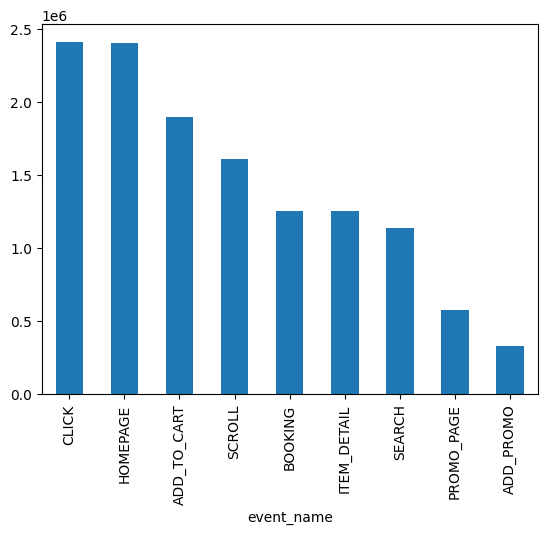

In [14]:
# xem phân phối loại sự kiện
clickstream['event_name'].value_counts().plot(kind='bar')

In [15]:
event_summary = clickstream.groupby('event_name').size().sort_values(ascending=False)
print(event_summary)

event_name
CLICK          2410327
HOMEPAGE       2406144
ADD_TO_CART    1894531
SCROLL         1608635
BOOKING        1254578
ITEM_DETAIL    1251787
SEARCH         1134598
PROMO_PAGE      577865
ADD_PROMO       326535
dtype: int64


In [16]:
# chuyển đổi event_time sang định dạng thời gian
clickstream['event_time'] = pd.to_datetime(clickstream['event_time'])

In [17]:
clickstream['event_time']

0          2026-02-04 19:17:15.252676
1          2023-12-01 13:01:58.791719
2          2025-10-05 20:43:44.670065
3          2025-03-12 21:51:25.713078
4          2021-03-03 01:03:27.634969
                      ...            
13235593   2025-04-13 05:42:10.248699
13235594   2025-06-28 20:34:12.619970
13235595   2025-01-27 15:34:04.020906
13235596   2024-05-07 04:38:30.471019
13235597   2020-10-13 11:53:48.136405
Name: event_time, Length: 12865000, dtype: datetime64[ns]

In [18]:
# Kiểm tra thời gian bắt đầu và kết thúc
start_time = clickstream['event_time'].min()
end_time = clickstream['event_time'].max()

print(f"Thời gian bắt đầu: {start_time}")
print(f"Thời gian kết thúc: {end_time}")


Thời gian bắt đầu: 2020-03-27 22:59:36.254358
Thời gian kết thúc: 2026-04-28 00:49:59.408424


In [20]:
# ta thấy có xuất hiện thời gian kết thúc là 2026, có vẻ không hợp lệ

# tìm các hàng có giá trị thời gian bất thường
future_events = clickstream[clickstream['event_time'] > pd.Timestamp.now()]
future_events

,customer_id,session_id,event_name,event_time,event_id,traffic_source,event_metadata,payment_status,search_keywords,booking_id,product_id,quantity,item_price,price_usd
0,98980.0,5a055089-d013-49cd-bb97-1feaf69e5519,ADD_TO_CART,2026-02-04 19:17:15.252676,4210ef54-aabb-4c6d-9451-fea9855ab91f,MOBILE,"{''product_id'': 33385, ''quantity'': 1, ''ite...",NaN,NaN,NaN,33385.0,1.0,302696.0,20.89
2,53587.0,4e926037-2914-44e6-b5c5-69ad5e13fc2b,ADD_TO_CART,2025-10-05 20:43:44.670065,3b84c959-96c4-4987-98d6-4282a82ec6bb,MOBILE,"{''product_id'': 33429, ''quantity'': 1, ''ite...",NaN,NaN,NaN,33429.0,1.0,318282.0,22.28
3,3744.0,862bd6b2-301c-4831-8880-37508a977589,ADD_TO_CART,2025-03-12 21:51:25.713078,2497c485-a25e-4797-b442-6f76f6687624,MOBILE,"{''product_id'': 33517, ''quantity'': 1, ''ite...",NaN,NaN,NaN,33517.0,1.0,337456.0,23.62
5,74474.0,3d4ba21c-120b-4522-941f-4528c738b080,ADD_TO_CART,2026-02-14 02:57:43.462165,81bc238c-4179-45cb-8a5f-66c58bcd2d30,MOBILE,"{''product_id'': 33589, ''quantity'': 1, ''ite...",NaN,NaN,NaN,33589.0,1.0,104513.0,7.11
6,99554.0,ee41b316-3d1f-4642-aeba-8270a2f25f07,ADD_TO_CART,2026-02-26 23:40:36.509222,26b0c139-5d34-4457-ba75-a9ae708c14ec,MOBILE,"{''product_id'': 33617, ''quantity'': 1, ''ite...",NaN,NaN,NaN,33617.0,1.0,169689.0,11.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13235588,92717.0,506c22bf-24fb-4da9-aada-e1cfa07b2705,ADD_TO_CART,2025-03-13 09:18:28.185881,49b1d6ce-6beb-488d-9500-d114ec54842a,MOBILE,"{''product_id'': 32463, ''quantity'': 1, ''ite...",NaN,NaN,NaN,32463.0,1.0,279445.0,19.56
13235591,74287.0,cd451515-b824-4d76-9614-206026ab8743,ADD_TO_CART,2026-01-23 10:44:29.077195,fb7ea0e4-c788-4b8e-b24d-6beb5df0b91e,MOBILE,"{''product_id'': 32645, ''quantity'': 1, ''ite...",NaN,NaN,NaN,32645.0,1.0,256533.0,17.70
13235593,40786.0,c408826f-6462-427b-9a97-a2063c8b8e36,ADD_TO_CART,2025-04-13 05:42:10.248699,524a82c4-bfeb-44e8-95b5-b7db3991d0e4,MOBILE,"{''product_id'': 32802, ''quantity'': 1, ''ite...",NaN,NaN,NaN,32802.0,1.0,222944.0,15.38
13235594,30229.0,9313bf93-935a-4b7c-86f5-03e7e8666b7d,ADD_TO_CART,2025-06-28 20:34:12.619970,19115e5c-c081-411e-8dbc-ca2f6577c3d6,MOBILE,"{''product_id'': 32847, ''quantity'': 1, ''ite...",NaN,NaN,NaN,32847.0,1.0,365756.0,25.60


year
2020     148959
2021     649092
2022    1248765
2023    1931855
2024    2864325
2025    4318505
2026    1703499
Name: count, dtype: int64


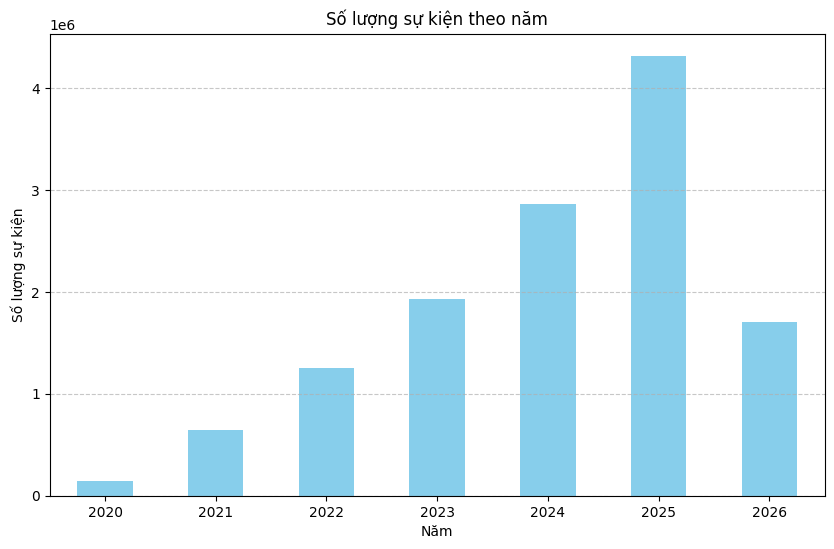

In [21]:
# thống kê số lượng sự kiện theo từng năm

# Thêm cột 'year' để lưu trữ năm từ event_time
clickstream['year'] = clickstream['event_time'].dt.year

# Thống kê số lượng sự kiện theo từng năm
events_per_year = clickstream['year'].value_counts().sort_index()

# Hiển thị kết quả
print(events_per_year)

# Nếu muốn vẽ biểu đồ trực quan
import matplotlib.pyplot as plt

events_per_year.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Số lượng sự kiện theo năm")
plt.xlabel("Năm")
plt.ylabel("Số lượng sự kiện")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [24]:
# sắp xếp lại thời gian cho đúng thứ tự sự kiện
clickstream = clickstream.sort_values(by='event_time')

<Axes: ylabel='count'>

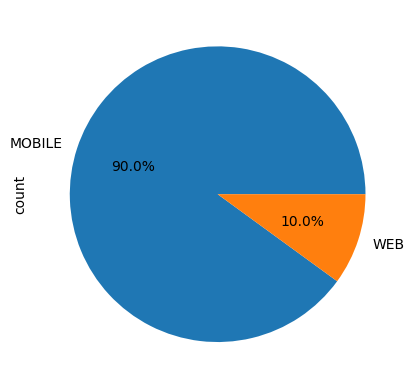

In [25]:
# xem phân phối nguồn truy cập
clickstream['traffic_source'].value_counts().plot(kind='pie', autopct='%1.1f%%')


In [ ]:
# dữ liệu nguồn truy cập quá mất cân bằng, có thể cân nhắc bỏ ra khỏi các đặc trưng dùng để khuyến nghị

In [27]:
# số lượng metadata được tạo ra từ người dùng
clickstream[clickstream['event_metadata'].notna()].shape[0]

4610242

In [31]:
clickstream['event_metadata']

419907                                                    NaN
1133586                                                   NaN
210728      {''product_id'': 33314, ''quantity'': 3, ''ite...
9835582                                                   NaN
3505073                                                   NaN
                                  ...                        
11496391                                                  NaN
5622503                                                   NaN
9848490                                                   NaN
10783448                                                  NaN
6461005                                                   NaN
Name: event_metadata, Length: 12865000, dtype: object

In [35]:
# phân tích cột event_metadata bằng json
import json

# Hàm sửa lỗi JSON
def fix_metadata(meta_data):
    if pd.isna(meta_data):
        return None
    # Thay thế các dấu nháy đơn kép '' thành dấu ngoặc kép "
    corrected_meta_data = meta_data.replace("''", '"')
    try:
        # Giải mã JSON sau khi sửa
        return json.loads(corrected_meta_data)
    except json.JSONDecodeError:
        # Nếu lỗi, trả về None
        return None

# Áp dụng hàm cho cột meta_data
clickstream['meta_data_fixed'] = clickstream['event_metadata'].apply(fix_metadata)

print("Dữ liệu sau khi xử lý:")
clickstream


Dữ liệu sau khi xử lý:


,customer_id,session_id,event_name,event_time,event_id,traffic_source,event_metadata,payment_status,search_keywords,booking_id,product_id,quantity,item_price,price_usd,year,meta_data_fixed
419907,74089.0,607d864b-76b5-45a1-a45d-7fb666a03ea1,HOMEPAGE,2020-03-27 22:59:36.254358,b914446d-e529-4f12-8227-7b5929f15041,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,None
1133586,74089.0,607d864b-76b5-45a1-a45d-7fb666a03ea1,SCROLL,2020-03-27 23:01:06.254358,a31585e1-2937-4c1e-b884-f51bdf7dc0be,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,None
210728,74089.0,607d864b-76b5-45a1-a45d-7fb666a03ea1,ADD_TO_CART,2020-03-27 23:01:14.254358,782f944f-7118-4e72-ab47-8cd3b68b9fab,MOBILE,"{''product_id'': 33314, ''quantity'': 3, ''ite...",NaN,NaN,NaN,33314.0,3.0,210265.0,15.98,2020,"{'product_id': 33314, 'quantity': 3, 'item_pri..."
9835582,74089.0,607d864b-76b5-45a1-a45d-7fb666a03ea1,CLICK,2020-03-27 23:02:35.254358,584413a5-2afa-4cbe-99d8-467bb61139ba,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,None
3505073,74089.0,607d864b-76b5-45a1-a45d-7fb666a03ea1,SCROLL,2020-03-27 23:03:56.254358,3f4646c3-0a66-4c96-bcbf-5c653e877013,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11496391,8202.0,87a77ed6-e487-45d2-b73b-aa9277a2d717,HOMEPAGE,2026-04-28 00:24:28.200546,439df875-64eb-4f13-8871-a57af159bc48,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2026,None
5622503,22285.0,f837b3a2-7908-42df-8969-3f879ebb4c25,HOMEPAGE,2026-04-28 00:29:20.408424,5b27329b-c28e-42a6-9c92-df4a3ef0fe2e,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2026,None
9848490,97256.0,48bdb39a-195d-4acf-835a-35556390f7dd,CLICK,2026-04-28 00:31:53.957678,a0d5d325-966f-44f0-99ed-b8670ef4601f,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2026,None
10783448,22285.0,f837b3a2-7908-42df-8969-3f879ebb4c25,ITEM_DETAIL,2026-04-28 00:39:39.408424,b5246bc6-843f-40d6-9ebc-3d666576c522,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2026,None


In [38]:
# thống kê số lượng sự kiện có tương tác với sản phẩm
clickstream[clickstream['product_id'].notna()]

,customer_id,session_id,event_name,event_time,event_id,traffic_source,event_metadata,payment_status,search_keywords,booking_id,product_id,quantity,item_price,price_usd,year,meta_data_fixed
210728,74089.0,607d864b-76b5-45a1-a45d-7fb666a03ea1,ADD_TO_CART,2020-03-27 23:01:14.254358,782f944f-7118-4e72-ab47-8cd3b68b9fab,MOBILE,"{''product_id'': 33314, ''quantity'': 3, ''ite...",NaN,NaN,NaN,33314.0,3.0,210265.0,15.98,2020,"{'product_id': 33314, 'quantity': 3, 'item_pri..."
3655530,74089.0,607d864b-76b5-45a1-a45d-7fb666a03ea1,BOOKING,2020-03-27 23:18:44.792905,cc8314e5-f925-4e96-a819-41592834199a,MOBILE,{'payment_status': 'Success'},Success,NaN,2dd76c45-6ddb-46b4-9c91-c59d4f9b76ba,33314.0,3.0,210265.0,15.98,2020,None
1587002,6183.0,c5d3792d-9220-47db-ad80-4932f3f88d0e,ADD_TO_CART,2020-03-28 02:19:09.860873,5dae5d05-8efd-4dd3-8f7c-d5805960a4b8,MOBILE,"{''product_id'': 16061, ''quantity'': 1, ''ite...",NaN,NaN,NaN,16061.0,1.0,163539.0,12.43,2020,"{'product_id': 16061, 'quantity': 1, 'item_pri..."
2101467,6183.0,c5d3792d-9220-47db-ad80-4932f3f88d0e,ADD_TO_CART,2020-03-28 02:26:03.860873,1332f98a-a4aa-4cb9-8d46-30da3084eec9,MOBILE,"{''product_id'': 7588, ''quantity'': 1, ''item...",NaN,NaN,NaN,7588.0,1.0,411340.0,31.26,2020,"{'product_id': 7588, 'quantity': 1, 'item_pric..."
7655587,6183.0,c5d3792d-9220-47db-ad80-4932f3f88d0e,BOOKING,2020-03-28 02:53:26.720195,df9f8aa7-0bb5-493e-81d9-8cecca5b4140,MOBILE,{'payment_status': 'Success'},Success,NaN,b9724455-552e-4deb-9351-4a4fe4ee0b8f,16061.0,1.0,163539.0,12.43,2020,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6089937,22285.0,f837b3a2-7908-42df-8969-3f879ebb4c25,BOOKING,2026-04-27 23:59:03.408424,f2282844-4377-487e-939f-7abe94fd3482,MOBILE,{'payment_status': 'Success'},Success,NaN,a43bfc27-6a49-465b-8690-901b8d79acef,27404.0,1.0,150339.0,10.07,2026,None
217643,19551.0,b0043d8b-2b6a-443a-80f2-567486e79bf9,ADD_TO_CART,2026-04-27 23:59:12.821469,8381526d-3656-4ec2-9051-3018b1caa54a,WEB,"{''product_id'': 25189, ''quantity'': 1, ''ite...",NaN,NaN,NaN,25189.0,1.0,197327.0,13.22,2026,"{'product_id': 25189, 'quantity': 1, 'item_pri..."
12130401,19551.0,b0043d8b-2b6a-443a-80f2-567486e79bf9,BOOKING,2026-04-27 23:59:19.821469,d7cd04bc-1470-4c2d-a16f-d2ef2cc81c95,WEB,{'payment_status': 'Success'},Success,NaN,1f9b9f8a-1a72-4e4c-87a6-355390a7abf6,25189.0,1.0,197327.0,13.22,2026,None
10279453,19551.0,95168514-c4a8-4611-8739-c45dc6374b43,ADD_TO_CART,2026-04-27 23:59:36.821469,fba48603-7584-49b2-9d00-32e7e5ff59fe,WEB,"{''product_id'': 17311, ''quantity'': 1, ''ite...",NaN,NaN,NaN,17311.0,1.0,157609.0,10.56,2026,"{'product_id': 17311, 'quantity': 1, 'item_pri..."


In [40]:
# xem các trạng thái thanh toán
clickstream['payment_status'].unique()

array([nan, 'Success', 'Failed'], dtype=object)

In [41]:
# Tổng số sự kiện đặt mua
total_purchases = clickstream[clickstream['event_name'] == 'BOOKING'].shape[0]

# Tổng số thanh toán thành công
successful_payments = clickstream[clickstream['payment_status'] == 'Success'].shape[0]

# Tỷ lệ thanh toán thành công
success_payment_rate = successful_payments / total_purchases if total_purchases > 0 else 0

# Tỷ lệ đặt mua so với tổng sự kiện
total_events = clickstream.shape[0]
purchase_rate = total_purchases / total_events if total_events > 0 else 0

# Hiển thị kết quả
print(f"Tổng số sự kiện đặt mua: {total_purchases}")
print(f"Tổng số thanh toán thành công: {successful_payments}")
print(f"Tỷ lệ thanh toán thành công: {success_payment_rate:.2%}")
print(f"Tỷ lệ đặt mua so với tổng sự kiện: {purchase_rate:.2%}")

Tổng số sự kiện đặt mua: 1254578
Tổng số thanh toán thành công: 1201028
Tỷ lệ thanh toán thành công: 95.73%
Tỷ lệ đặt mua so với tổng sự kiện: 9.75%


In [43]:
clickstream['search_keywords'].unique()

array([nan, 'Dress Pesta', 'Dress Kondangan', 'Tas Wanita', 'Bekas',
       'Tas Kerja', 'Barang Bekas', 'T-Shirt', 'Sepatu', 'Second Hand',
       'Baju', 'Sepatu Nike', 'Kaos', 'Celana Panjang', 'Sepatu Adidas',
       'Thrift', 'T-shirt', 'Sendal', 'Jam', 'Celana', 'Second', 'Topi',
       'Daster', 'Baju Tidur'], dtype=object)

In [44]:
# Tần suất từ khóa
keyword_frequency = (
    clickstream[clickstream['event_name'] == 'SEARCH']
    .groupby('search_keywords')
    .size()
    .sort_values(ascending=False)
)

print("Tần suất tìm kiếm của từng từ khóa:")
print(keyword_frequency)


Tần suất tìm kiếm của từng từ khóa:
search_keywords
Dress Kondangan    247039
Tas Wanita         124176
Bekas              108539
T-Shirt             97334
Baju                81150
Kaos                80995
Dress Pesta         74093
Sepatu Nike         49728
Tas Kerja           37323
Second Hand         27470
Second              27271
Thrift              27250
Sepatu              27109
Celana Panjang      27098
Barang Bekas        26900
Sepatu Adidas       24662
Sendal              12316
Celana              11739
T-shirt              7097
Jam                  7000
Topi                 4844
Baju Tidur           2268
Daster               1197
dtype: int64


In [45]:
product = pd.read_csv('../data/raw/product.csv')
product

,id,gender,mastercategory,subcategory,articletype,basecolour,season,year,usage,productdisplayname
0,51829,Women,Apparel,Innerwear,Bra,Red,Summer,2016.0,Casual,Bwitch Red Bra
1,39543,Women,Apparel,Innerwear,Bra,Red,Winter,2015.0,Casual,Bwitch Red Bra
2,51194,Women,Apparel,Innerwear,Bra,Red,Summer,2014.0,Casual,Enamor Red Bra
3,51050,Women,Apparel,Innerwear,Bra,Red,Summer,2017.0,Casual,Enamor Red Bra
4,51777,Women,Apparel,Innerwear,Bra,Blue,Summer,2016.0,Casual,Bwitch Blue Bra
...,...,...,...,...,...,...,...,...,...,...
44441,57763,Women,Personal Care,Skin Care,Face Scrub and Exfoliator,Cream,Spring,2017.0,NaN,Lotus Herbals Apriscrub
44442,57699,Women,Personal Care,Skin,Face Scrub and Exfoliator,Cream,Spring,2017.0,Casual,Lotus Herbals Quince Seed Massage Cream
44443,57879,Women,Personal Care,Skin Care,Face Scrub and Exfoliator,Beige,Spring,2017.0,Casual,Biotique Women Bio Papaya Revitalizing Scrub
44444,57766,Women,Personal Care,Skin Care,Face Scrub and Exfoliator,Cream,Spring,2017.0,Casual,Lotus Herbals Apriscrub Fresh Apricot Scrub 60g


In [48]:
product['mastercategory'].unique()

array(['Apparel', 'Accessories', 'Free Items', 'Footwear',
       'Personal Care', 'Sporting Goods', 'Home'], dtype=object)

In [49]:
product['subcategory'].unique()

array(['Innerwear', 'Headwear', 'Vouchers', 'Jewellery',
       'Loungewear and Nightwear', 'Ties', 'Free Gifts', 'Topwear',
       'Bottomwear', 'Belts', 'Shoes', 'Socks', 'Skin Care', 'Gloves',
       'Saree', 'Stoles', 'Makeup', 'Dress', 'Eyes', 'Sandal', 'Scarves',
       'Watches', 'Wallets', 'Bags', 'Lips', 'Mufflers', 'Apparel Set',
       'Cufflinks', 'Fragrance', 'Sports Equipment', 'Accessories',
       'Umbrellas', 'Flip Flops', 'Shoe Accessories', 'Eyewear',
       'Wristbands', 'Sports Accessories', 'Bath and Body', 'Skin',
       'Hair', 'Nails', 'Water Bottle', 'Home Furnishing',
       'Beauty Accessories', 'Perfumes'], dtype=object)

In [ ]:
# có thể sử dụng cả event search để map từ khóa người dùng đánh giá, từ đó tăng điểm quan tâm cho những sản phẩm mang loại đó.

In [39]:
# Thống kê số lượng sự kiện có tương tác với sản phẩm theo loại sự kiện
interaction_by_event = clickstream[clickstream['product_id'].notnull()].groupby('event_name')['product_id'].count()

# Hiển thị kết quả
print("Thống kê số lượng sự kiện có tương tác với sản phẩm theo loại sự kiện:")
print(interaction_by_event)


Thống kê số lượng sự kiện có tương tác với sản phẩm theo loại sự kiện:
event_name
ADD_TO_CART    1894531
BOOKING        1254578
Name: product_id, dtype: int64


In [ ]:
# như vậy, không có id sản phẩm nào được ghi lại bằng tương tác click hoặc item_detail. 
# do đó ta không thể dùng 2 event này để thực hiện xây dựng hệ khuyến nghị vì không biết đâu là sản phẩm nào.
# ta sẽ dùng 2 loại event là add_to_cart và booking này làm 2 tham số chính để tính toán mức độ quan tâm của người dùng tới sản phẩm, 
# còn những event khác có thể loại bỏ

In [50]:
# thống kê số lượng sản phẩm duy nhất
clickstream['product_id'].unique()

array([   nan, 33314., 16061., ..., 54660.,  3339., 54150.],
      shape=(44447,))

In [4]:
clickstream.dtypes

customer_id        float64
session_id          object
event_name          object
event_time          object
event_id            object
traffic_source      object
event_metadata      object
payment_status      object
search_keywords     object
booking_id          object
product_id         float64
quantity           float64
item_price         float64
price_usd          float64
dtype: object

In [5]:
clickstream['event_name'].unique()

array(['ADD_TO_CART', 'BOOKING', 'HOMEPAGE', 'CLICK', 'SCROLL', 'SEARCH',
       'ADD_PROMO', 'PROMO_PAGE', 'ITEM_DETAIL'], dtype=object)

In [8]:
customer = pd.read_csv("data/customer.csv")
customer.head(5)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,9223,Shania,Hassanah,66ca6c71-9367-4414-87bc-b2256e410699,66ca6c71_9367_4414_87bc_b2256e410699@startupca...,F,1999-11-17,iOS,f8664d9e-bc1b-43ee-941b-bb28eb914dda,iPhone; CPU iPhone OS 6_1_6 like Mac OS X,6.634183,5.930406,Edo,Nigeria,2018-01-28
1,99570,Zelaya,Purnawati,d330904b-277d-40f4-8652-5f3ef1bc30da,d330904b_277d_40f4_8652_5f3ef1bc30da@startupca...,F,1995-11-16,iOS,90159179-6982-425f-acf2-7ffd5911d0b3,iPad; CPU iPad OS 9_3_5 like Mac OS X,6.634183,5.930406,Edo,Nigeria,2021-11-09
2,98093,Zamira,Prastuti,e3f6497c-5a52-422c-878a-3c6ddea847ea,e3f6497c_5a52_422c_878a_3c6ddea847ea@startupca...,F,1996-09-30,Android,b91a812d-166e-4c31-ae1e-5e775282a1cd,Android 3.0,6.634183,5.930406,Edo,Nigeria,2022-02-20
3,56630,Zelda,Riyanti,05e440c1-c081-46ba-80ad-def3d5ba5115,05e440c1_c081_46ba_80ad_def3d5ba5115@zakyfound...,F,2003-07-16,Android,b164d18f-627d-4349-8752-e58f82d2612e,Android 4.3,6.634183,5.930406,Edo,Nigeria,2019-12-01
4,32552,Fitria,Lestari,94d467b3-1fc1-4cba-9edc-2b3fcf6d9534,94d467b3_1fc1_4cba_9edc_2b3fcf6d9534@startupca...,F,1985-04-01,Android,a7b347ac-4c38-481b-83a1-5d705010b8dc,Android 2.1,6.634183,5.930406,Edo,Nigeria,2016-08-08


In [14]:
clickstream[(clickstream['event_name'] == 'CLICK') & (clickstream['product_id'].notna())]


,customer_id,session_id,event_name,event_time,event_id,traffic_source,event_metadata,payment_status,search_keywords,booking_id,product_id,quantity,item_price,price_usd


In [4]:
product = pd.read_csv("../data/raw/product.csv")
product.head(5)

,id,gender,mastercategory,subcategory,articletype,basecolour,season,year,usage,productdisplayname
0,51829,Women,Apparel,Innerwear,Bra,Red,Summer,2016.0,Casual,Bwitch Red Bra
1,39543,Women,Apparel,Innerwear,Bra,Red,Winter,2015.0,Casual,Bwitch Red Bra
2,51194,Women,Apparel,Innerwear,Bra,Red,Summer,2014.0,Casual,Enamor Red Bra
3,51050,Women,Apparel,Innerwear,Bra,Red,Summer,2017.0,Casual,Enamor Red Bra
4,51777,Women,Apparel,Innerwear,Bra,Blue,Summer,2016.0,Casual,Bwitch Blue Bra


In [5]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44446 non-null  int64  
 1   gender              44446 non-null  object 
 2   mastercategory      44446 non-null  object 
 3   subcategory         44446 non-null  object 
 4   articletype         44446 non-null  object 
 5   basecolour          44431 non-null  object 
 6   season              44425 non-null  object 
 7   year                44445 non-null  float64
 8   usage               44129 non-null  object 
 9   productdisplayname  44446 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [6]:
product.isnull().sum()

id                      0
gender                  0
mastercategory          0
subcategory             0
articletype             0
basecolour             15
season                 21
year                    1
usage                 317
productdisplayname      0
dtype: int64

In [10]:
product['gender'].unique()

array(['Women', 'Men', 'Unisex', 'Boys', 'Girls'], dtype=object)

In [11]:
product['mastercategory'].unique()

array(['Apparel', 'Accessories', 'Free Items', 'Footwear',
       'Personal Care', 'Sporting Goods', 'Home'], dtype=object)

In [13]:
product['subcategory'].unique()

array(['Innerwear', 'Headwear', 'Vouchers', 'Jewellery',
       'Loungewear and Nightwear', 'Ties', 'Free Gifts', 'Topwear',
       'Bottomwear', 'Belts', 'Shoes', 'Socks', 'Skin Care', 'Gloves',
       'Saree', 'Stoles', 'Makeup', 'Dress', 'Eyes', 'Sandal', 'Scarves',
       'Watches', 'Wallets', 'Bags', 'Lips', 'Mufflers', 'Apparel Set',
       'Cufflinks', 'Fragrance', 'Sports Equipment', 'Accessories',
       'Umbrellas', 'Flip Flops', 'Shoe Accessories', 'Eyewear',
       'Wristbands', 'Sports Accessories', 'Bath and Body', 'Skin',
       'Hair', 'Nails', 'Water Bottle', 'Home Furnishing',
       'Beauty Accessories', 'Perfumes'], dtype=object)

In [16]:
product['articletype'].unique()

array(['Bra', 'Caps', 'Hat', 'Ipad', 'Ring', 'Robe', 'Ties', 'Tops',
       'Jeans', 'Belts', 'Flats', 'Heels', 'Shrug', 'Socks', 'Kurtas',
       'Suits', 'Toner', 'Trunk', 'Bangle', 'Boxers', 'Briefs', 'Capris',
       'Gloves', 'Kurtis', 'Salwar', 'Sarees', 'Shirts', 'Shorts',
       'Skirts', 'Stoles', 'Tights', 'Tunics', 'Blazers', 'Booties',
       'Compact', 'Dresses', 'Dupatta', 'Tshirts', 'Jackets', 'Mascara',
       'Patiala', 'Pendant', 'Rompers', 'Sandals', 'Scarves', 'Watches',
       'Wallets', 'Handbags', 'Bracelet', 'Churidar', 'Clutches',
       'Earrings', 'Headband', 'Jeggings', 'Jumpsuit', 'Leggings',
       'Lip Care', 'Lipstick', 'Casual Shoes', 'Mufflers', 'Sweaters',
       'Swimwear', 'Trousers', 'Backpacks', 'Bath Robe', 'Camisoles',
       'Concealer', 'Cufflinks', 'Deodorant', 'Eye Cream', 'Eyeshadow',
       'Footballs', 'Key chain', 'Lip Gloss', 'Lip Liner', 'Rucksacks',
       'Shapewear', 'Stockings', 'Sunscreen', 'Umbrellas', 'Waistcoat',
       'Baby D

In [17]:
product['basecolour'].unique()

array(['Red', 'Blue', 'Grey', 'Pink', 'Beige', 'Black', 'Cream', 'White',
       'Brown', 'Maroon', 'Purple', 'Lavender', 'Nude', 'Skin',
       'Navy Blue', 'Rose', 'Peach', 'Green', 'Teal', 'Gold', 'Orange',
       'Silver', 'Turquoise Blue', 'Off White', 'Grey Melange',
       'Mushroom Brown', 'Burgundy', 'Olive', 'Yellow', 'Khaki', 'Steel',
       'Copper', 'Multi', 'Tan', 'Magenta', 'Sea Green', 'Mustard',
       'Rust', 'Mauve', 'Lime Green', 'Charcoal', 'Bronze',
       'Coffee Brown', 'Metallic', 'Taupe', nan, 'Fluorescent Green'],
      dtype=object)

In [18]:
product['season'].unique()

array(['Summer', 'Winter', 'Fall', 'Spring', nan], dtype=object)

In [19]:
product['usage'].unique()

array(['Casual', 'Sports', 'Formal', 'Smart Casual', 'Ethnic', 'Party',
       nan, 'Travel', 'Home'], dtype=object)

In [20]:
product['year'].unique()

array([2016., 2015., 2014., 2017., 2012., 2018., 2011., 2013., 2010.,
       2008., 2009., 2019.,   nan, 2007.])

In [22]:
product['productdisplayname'].unique()

array(['Bwitch Red Bra  ', 'Enamor Red Bra  ', 'Bwitch Blue Bra  ', ...,
       'Biotique Women Bio Papaya Revitalizing Scrub  ',
       'Lotus Herbals Apriscrub Fresh Apricot Scrub 60g  ',
       'Biotique Women Bio Walnut Purifying & Polishing Scrub  '],
      shape=(31137,), dtype=object)